This notebooks plots the diagrams for the [5th value proposition](https://www.notion.so/mortynia/VP5-Refactored-task-space-78509192c47b47b29d20ea7d272a6060), refactored task space.

In [1]:
# figure 1: number of tasks per publication

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set('paper', 'whitegrid')  # noqa

from python.cogtext.datasets.pubmed import PubMedDataLoader

# load the data
PUBMED = PubMedDataLoader(preprocessed=False).load()

ValueError: Could not interpret value `year` for parameter `hue`

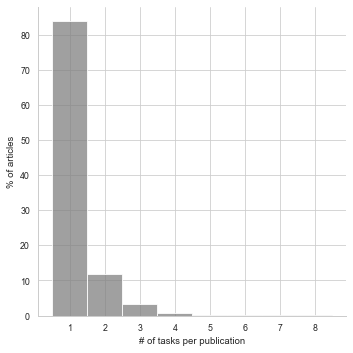

In [11]:
# number of tasks per study

task_counts_by_pmids = PUBMED.query('category.str.contains("Task")').groupby(['pmid','year'])[['category','label']].count()
task_counts_by_pmids['label'] = task_counts_by_pmids['label'].astype('category')

n_pubs = PUBMED.query('category.str.contains("Task")')['pmid'].nunique()

task_cnts = task_counts_by_pmids.value_counts().to_frame()
task_pcts = task_cnts * 100 / n_pubs

sns.displot(task_counts_by_pmids,
            x='label',
            color='gray',
            stat='percent',
            # hue='year',
            aspect=1).set(
  xlabel='# of tasks per publication',
  ylabel='% of articles',
  # ylim=(-1000,35000),
  # title='Number of cognitive tasks per article in a corpus of 39637 articles\n'
        # 'that mentioned at least one task name. Gray bar labels are the number of articles.'
)

g = sns.lineplot(data=task_pcts, x='label', hue='year', y=0, lw=2, color='black')

# plot labels
for index, row in task_cnts.iterrows():
  x = row.name[0]
  y = task_pcts.loc[index] + 1.0
  lbl = round(row[0],2)
  g.text(x, y, lbl, color='gray', ha="center")


# plt.show()

In [125]:

# TODO: number of unique tasks per constructs
xxx = task_per_pub_counts.value_counts().to_frame() / PUBMED.query('category.str.contains("Task")')['pmid'].nunique()
xxx.sum()

0    1.0
dtype: float64

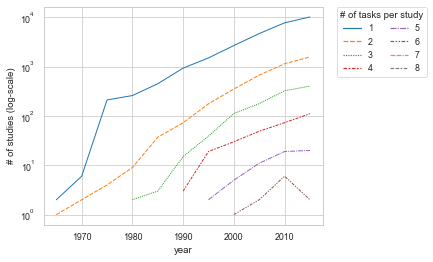

In [90]:
cnts = PUBMED.query('category.str.contains("Task")').groupby(['pmid'])[['label']].count()

years = PUBMED.query('category.str.contains("Task")').groupby(['pmid']).apply(lambda x: x['year'].iloc[0])

cnts = pd.concat([cnts, years], axis=1).rename(columns={0:'year', 'label':'n_tasks'}).reset_index()
# cnts = cnts.set_index(['pmid','year'])

cnts
# sns.lineplot(data=cnts, x='year', y='label', hue='year', y=0, lw=2)

# cnts.groupby('label')
cnts['year'] = cnts['year'] // 5 * 5
# cnts = cnts.query('decade ')

cnts = cnts.groupby('n_tasks').apply(lambda x: x.groupby('year').count())['pmid'].reset_index()
cnts.rename(columns={'pmid':'n_articles'}, inplace=True)
# cnts = cnts.query('n_tasks > 1 and year < 2020')
cnts = cnts.query('year < 2020')

plt.figure(figsize=(5,4))
g = sns.lineplot(data=cnts, x='year', y='n_articles', hue='n_tasks', style='n_tasks', lw=1, palette='tab10')
g.set(yscale='log')

plt.legend(title='# of tasks per study', bbox_to_anchor=(1.05, 1),
           ncol=2,
           loc=2, borderaxespad=0.)
plt.ylabel('# of studies (log-scale)')
plt.show()

# TODO show single-tasks as a disconnected curve
# TODO show percentages along the curve